# Derivatives refresher

Derivatives have many practical applications in various fields like physics, engineering, economics, etc. They are used to solve problems involving rates of change and motion, optimization problems, and in the calculation of instantaneous velocity or acceleration, among other things.

Derivatives answer the question: "If I increase the input, does the output increase or decrease ? and by how much ?"

When we draw a curve that represents a mathematical function, and then a straight line that just touches the curve at one specific point, we call that a _tangent line_ at that point. Mathematically, this means that the tangent line and the curve have the same slope at that point.

In calculus, we often want to find the slope of a curve at a specific point, not just the slope of a straight line. Derivatives are a way of finding **the instantaneous rate of change** or **the slope** of a function at any point.

A derivative in calculus is a measure of how a function changes as its input changes. It's like the speedometer of a car; it tells you how fast you're going at any point in time. In mathematical terms, the derivative of a function at a certain point is the slope of the line tangent to the function at that point.

The derivative of a function is often written as `f'(x)`, or `df/dx`. Both notations mean the same thing: the derivative of `f` with respect to `x`.

For example, if `f'(2) = 4`; this means several things:

- at `x = 2` the slope of the function `f(x)` is `4`
- we can interpret that any small change in `x` around `2` will increase `f(x)` 4 times as fast

In the context of a graph, the tangent line at a point on a curve gives us a good approximation of the curve near the point. This is because the tangent line and the curve have the same slope at that point, so they are "heading in the same direction".

The slope of a tangent line is given by the derivative of the function at that point. This effectively measures how the function changes at that point.

The idea behind a derivative of `f(x)`: you would take a very small difference in `x` and divide it by the corresponding difference in `y` to get the slope of the function at that point. By making the difference in `x` smaller and smaller, you can get a more accurate slope.

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np

## Our first derivatives rule: the constant rule

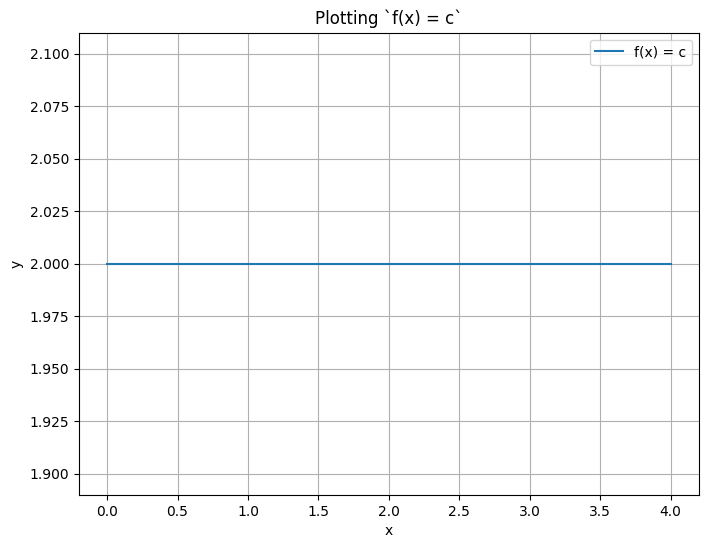

In [2]:
# let's illustrate our first derivatives rule: the constant rule
# e.g.: the derivative of a constant is 0

some_constant = 2
def derivative_constant_rule(x):
    # `np.full_like(x, some_constant)` creates a new array with the same shape and data type as the `x` array,
    # and fills it with the value `some_constant`,
    # this is useful for creating an array of constants with the same shape as another array
    return np.full_like(x, some_constant)

# Create an array of x values
x = np.linspace(0, 4)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, derivative_constant_rule(x), label="f(x) = c")
plt.legend()
plt.grid(True)
plt.title("Plotting `f(x) = c`")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# as you can see in the graph below, the derivative of a constant is 0

## the power rule of derivatives

The derivative of $x^n$ is $nx^{n-1}$.

The derivative of a function at a certain point is the slope of the line tangent to the function at that point.
In the context of a graph, the tangent line at a point on a curve gives us a good approximation of the curve near the point. This is because the tangent line and the curve have the same slope at that point, so they are "heading in the same direction".

Based on the equation of a straight line, $y = mx + b$, we can then write the equation of the tangent line of our power rule derivative as:

$$y = (nx^{n-1})x + x^n$$

... but this would give us the equation of the tangent of any line with the correct slope. What we want is the point of tangency, which would be `(some_x_coord, (x^n))`, and not just `x^n`.

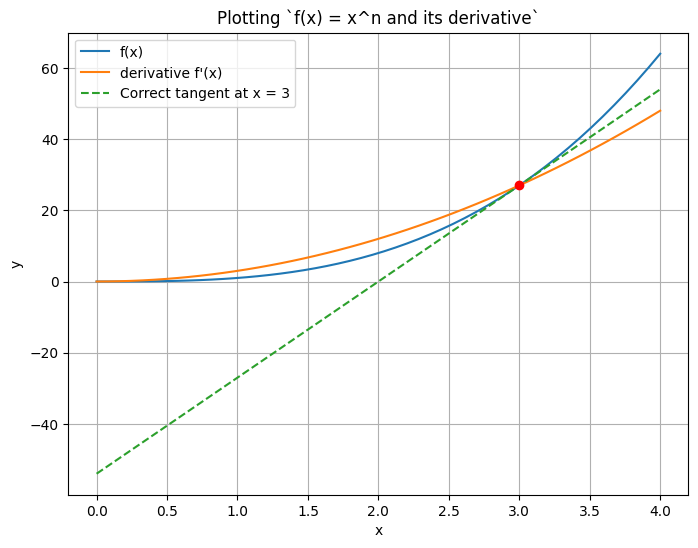

In [3]:
# let's illustrate the power rule

def pow_parent_function(x, n):
    return x ** n

def derivative_power_rule(x, n):
    return n * (x ** (n - 1))

def tangent_line_pow_rule(x, a, n):
    # this comes from an adaptation of the equation of the tangent line => 
    # `y=f'(a)(x−a)+f(a)` `a` being the point where we want to draw the tangent line,
    # `f'(a)` being the derivative of the parent function at `a`
    # `f(a)` being the value of the parent function at `a` (y-coordinate of the point of tangency)
    return derivative_power_rule(a, n) * (x - a) + pow_parent_function(a, n)

# Choose a point to draw the tangent line
a = 3

# Choose a value for n
n = 3

# Create an array of x values
x = np.linspace(0, 4)

# Generate y values for the function, correct tangent line, and incorrect tangent line
y = pow_parent_function(x, n)
tangent = tangent_line_pow_rule(x, a, n)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the parent function and its derivative
plt.plot(x, pow_parent_function(x, n), label="f(x)")
plt.plot(x, derivative_power_rule(x, n), label="derivative f'(x)")

# Plot the correct and incorrect tangent lines
plt.plot(x, tangent, label='Correct tangent at x = {}'.format(a), linestyle='--')

# Add a dot for the point of tangency
plt.plot(a, pow_parent_function(a,n), 'ro')

plt.legend()
plt.grid(True)
plt.title("Plotting `f(x) = x^n and its derivative`")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## A little aparté on tangent lines calculation with derivatives

We would be tempted to think that to get the equation of a tangent line of a function `f(a)` at a point `a`, we would just need to apply `y = mx + b` as in `y = f'(a)x + b` since `f'(a)` gives us the slope of the parent function at point `a`.

Let's rewrite `y = f'(a)x + b`. If we were to consider our tangent at point `a` and we were in need to find `b`, we could rewrite this expression as:

`f(a) = f'(a)a + b`

This mean that we can infer that `b` is equal to:

`b = f(a) - f'(a)a`

It's often more convenient to express the equation of a tangent line in point-slope form, as in:

`y - y1 = m(x - x1)`

So, if `(a, f(a))` is the point of tangency we want to plot for `f(a)`, and `f'(a)` is our slope, we get:

`y - f(a) = f'(a)(x - a)`

If we were to factorize this expression we would get:

`y = f'(a)(x - a) + f(a)`

And there we have it: our equation of the tangent line of `f(a)` at point `a`.

# the sum/difference rule of derivatives

The derivative of a sum/difference of functions is the sum/difference of the derivatives of the functions.

If `f(x) = g(x) + h(x)`, then `f'(x) = g'(x) + h'(x)`.

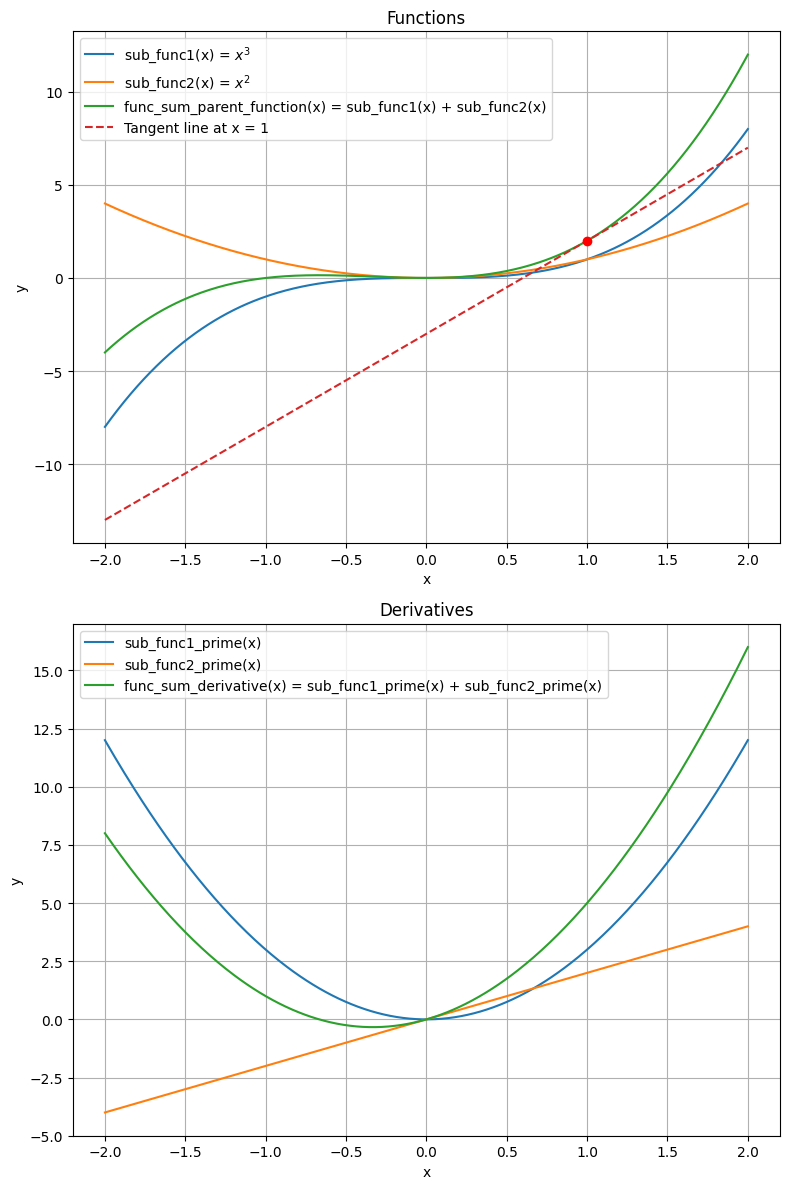

In [4]:
# Define the functions
def sub_func1(x):
    return x ** 3 
def sub_func2(x):
    return x ** 2
def func_sum_parent_function(x):
    return sub_func1(x) + sub_func2(x)  # This is func_sum_parent_function(x) = sub_func1(x) + sub_func2(x)

# Define the derivatives
def sub_func1_prime(x):
    return 3 * x ** 2  # This is sub_func1_prime(x)
def sub_func2_prime(x):
    return 2 * x  # This is sub_func2_prime(x)
def func_sum_derivative(x):
    return sub_func1_prime(x) + sub_func2_prime(x)  # This is func_sum_derivative(x) = sub_func1_prime(x) + sub_func2_prime(x)

def tangent_line_sum_diff_rule(x, a):
    return func_sum_derivative(a) * (x - a) + func_sum_parent_function(a)
    
# Create an array of x values
x = np.linspace(-2, 2, 400)

# Generate y values for the functions and their derivatives
sub_func1_y = sub_func1(x)
sub_func2_y = sub_func2(x)
func_sum_parent_function_y = func_sum_parent_function(x)
sub_func1_prime_y = sub_func1_prime(x)
sub_func2_prime_y = sub_func2_prime(x)
func_sum_derivative_y = func_sum_derivative(x)

# Generate y values for the tangent line at point x = 1
sum_diff_tangent_y = tangent_line_sum_diff_rule(x, 1)

# Create the plots
fig, axs = plt.subplots(2, figsize=(8, 12))

# Plot the functions
axs[0].plot(x, sub_func1_y, label="sub_func1(x) = $x^3$")
axs[0].plot(x, sub_func2_y, label="sub_func2(x) = $x^2$")
axs[0].plot(x, func_sum_parent_function_y, label="func_sum_parent_function(x) = sub_func1(x) + sub_func2(x)")
axs[0].plot(x, sum_diff_tangent_y, label='Tangent line at x = {}'.format(1), linestyle='--')  # tangent line
axs[0].plot(1, func_sum_parent_function(1), 'ro')  # selected point of tangency for this example
axs[0].legend()
axs[0].grid(True)
axs[0].set_title("Functions")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

# Plot the derivatives
axs[1].plot(x, sub_func1_prime_y, label="sub_func1_prime(x)")
axs[1].plot(x, sub_func2_prime_y, label="sub_func2_prime(x)")
axs[1].plot(x, func_sum_derivative_y, label="func_sum_derivative(x) = sub_func1_prime(x) + sub_func2_prime(x)")
axs[1].legend()
axs[1].grid(True)
axs[1].set_title("Derivatives")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

plt.tight_layout()
plt.show()

## the product rule for derivatives

The derivative of a product of two functions `f(x) = g(x) * h(x)` is:

`f'(x) = g(x) * h'(x) + h(x) * g'(x)`

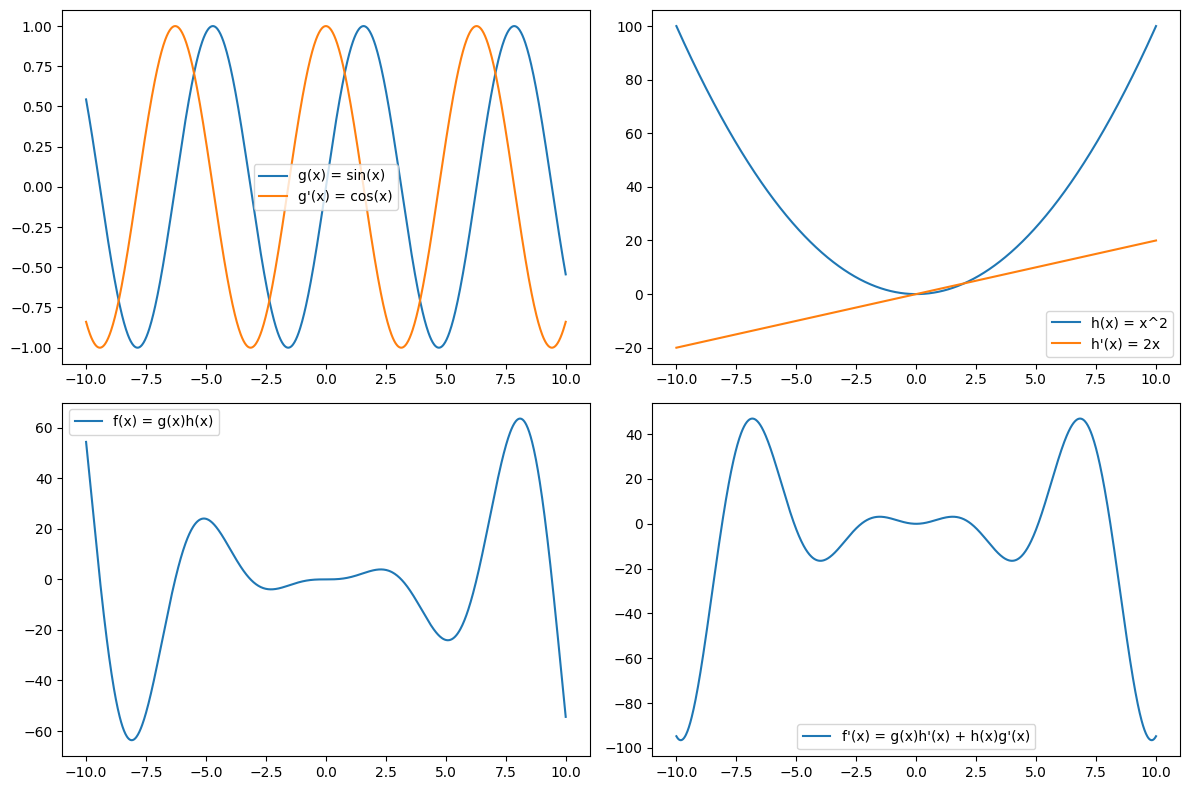

In [5]:
# let's illustrate the product rule for derivatives

# Define the functions g(x) and h(x), and their derivatives
def g(x):
    return np.sin(x)
def dg(x):
    return np.cos(x)
def h(x):
    return x**2
def dh(x):
    return 2*x

# Define a range of x values
x = np.linspace(-10, 10, 1000)

# Compute the functions and their product
gx = g(x)
hx = h(x)

# define the parent function
def func_product_parent_function(x):
    return g(x) * h(x)
fx = func_product_parent_function(x)

# Compute the derivative of the product using the product rule
def derivative_product_rule(x):
    return gx * dh(x) + hx * dg(x)
dfx = derivative_product_rule(x)

# Plot the functions and their product
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, gx, label='g(x) = sin(x)')
plt.plot(x, dg(x), label="g'(x) = cos(x)")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(x, hx, label='h(x) = x^2')
plt.plot(x, dh(x), label="h'(x) = 2x")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(x, fx, label='f(x) = g(x)h(x)')
plt.legend()

# Plot the derivative of the product
plt.subplot(2, 2, 4)
plt.plot(x, dfx, label="f'(x) = g(x)h'(x) + h(x)g'(x)")
plt.legend()

plt.tight_layout()
plt.show()

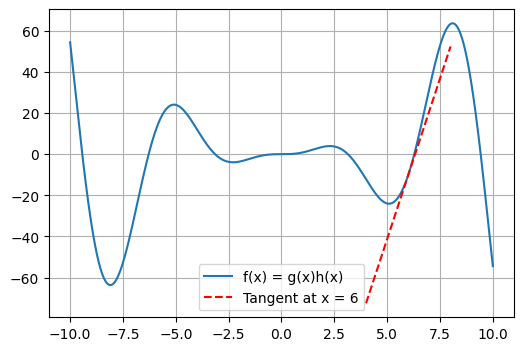

In [6]:
# now let's get the tangent line of our product of functions at point x = 6

# Define the same functions g(x) and h(x), and their derivatives
def g(x):
    return np.sin(x)
def dg(x):
    return np.cos(x)
def h(x):
    return x**2
def dh(x):
    return 2*x

# Define a range of x values
x = np.linspace(-10, 10, 1000)

# Compute the functions and their product
gx = g(x)
hx = h(x)
fx = gx * hx

# Calculate the value and the slope of the function at x = 6
x0 = 6
y0 = g(x0) * h(x0)  # Value of the function at x = 6
slope = g(x0) * dh(x0) + h(x0) * dg(x0)  # Derivative of the function at x = 6

# Define the tangent line
def tangent_line(x):
    return slope * (x - x0) + y0

# Define a range of x values around x0 for the tangent line
x_tangent = np.linspace(x0 - 2, x0 + 2, 400)

# Compute the tangent line
y_tangent_up = tangent_line(x_tangent)

# Plot the function and its tangent line at x0
plt.figure(figsize=(6, 4))
plt.plot(x, fx, label='f(x) = g(x)h(x)')
plt.plot(x_tangent, y_tangent_up, 'r--', label='Tangent at x = 6')
plt.legend()
plt.grid(True)
plt.show()

## the quotient rule of derivatives

The derivative of a quotient of 2 functions ca, be expressed as:

- parent function: $f(x) = \frac{g(x)}{h(x)}$

- derivative: $f'(x) = \frac{g'(x)h(x) - g(x)h'(x)}{h(x)^2}$

/tmp/ipykernel_218994/1715383284.py:21: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, g(x)/h(x), label="f(x) = g(x)/h(x)", color="gray")
/tmp/ipykernel_218994/1715383284.py:12: RuntimeWarning: invalid value encountered in divide
  f_prime = lambda x: (h(x) * dg(x) - g(x) * dh(x)) / h(x)**2


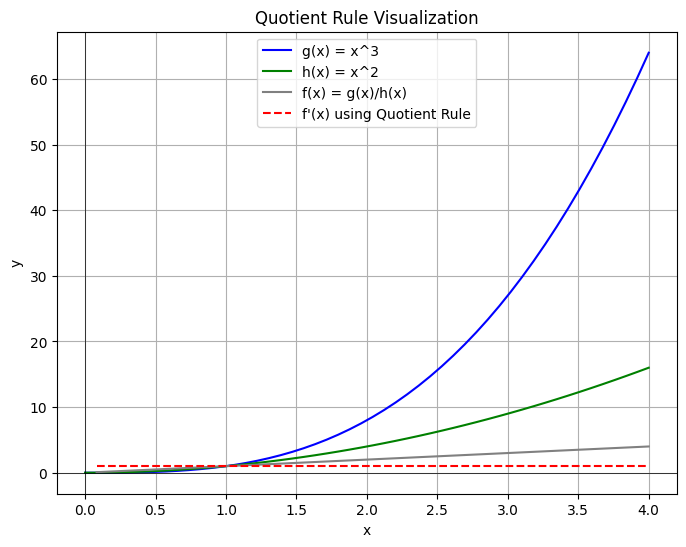

In [7]:
# Define the same functions g(x) and h(x), and their derivatives
def g(x):
    return x ** 3
def dg(x):
    return 3 * x ** 2
def h(x):
    return x**2
def dh(x):
    return 2*x

# Quotient rule for the derivative of f(x) = g(x)/h(x)
f_prime = lambda x: (h(x) * dg(x) - g(x) * dh(x)) / h(x)**2

# Values
x = np.linspace(0, 4)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, g(x), label="g(x) = x^3", color="blue")
plt.plot(x, h(x), label="h(x) = x^2", color="green")
plt.plot(x, g(x)/h(x), label="f(x) = g(x)/h(x)", color="gray")
plt.plot(x, f_prime(x), label="f'(x) using Quotient Rule", color="red", linestyle="--")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Quotient Rule Visualization")
plt.legend()
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Our latest graph is a good example of what may sometimes feel counterintuitive with derivatives:

Even though the parent function may increase at a point, the derivative may be negative. In such case, this means that the rate of change of the function is decreasing at that point: e.g. the function increases less and less as `x` increases.

## the chain rule of derivatives

Given a function `f(x) = g(h(x))`, the derivative of `f(x)` is given by the chain rule:

$$f'(x) = g'(h(x)) \cdot h'(x)$$

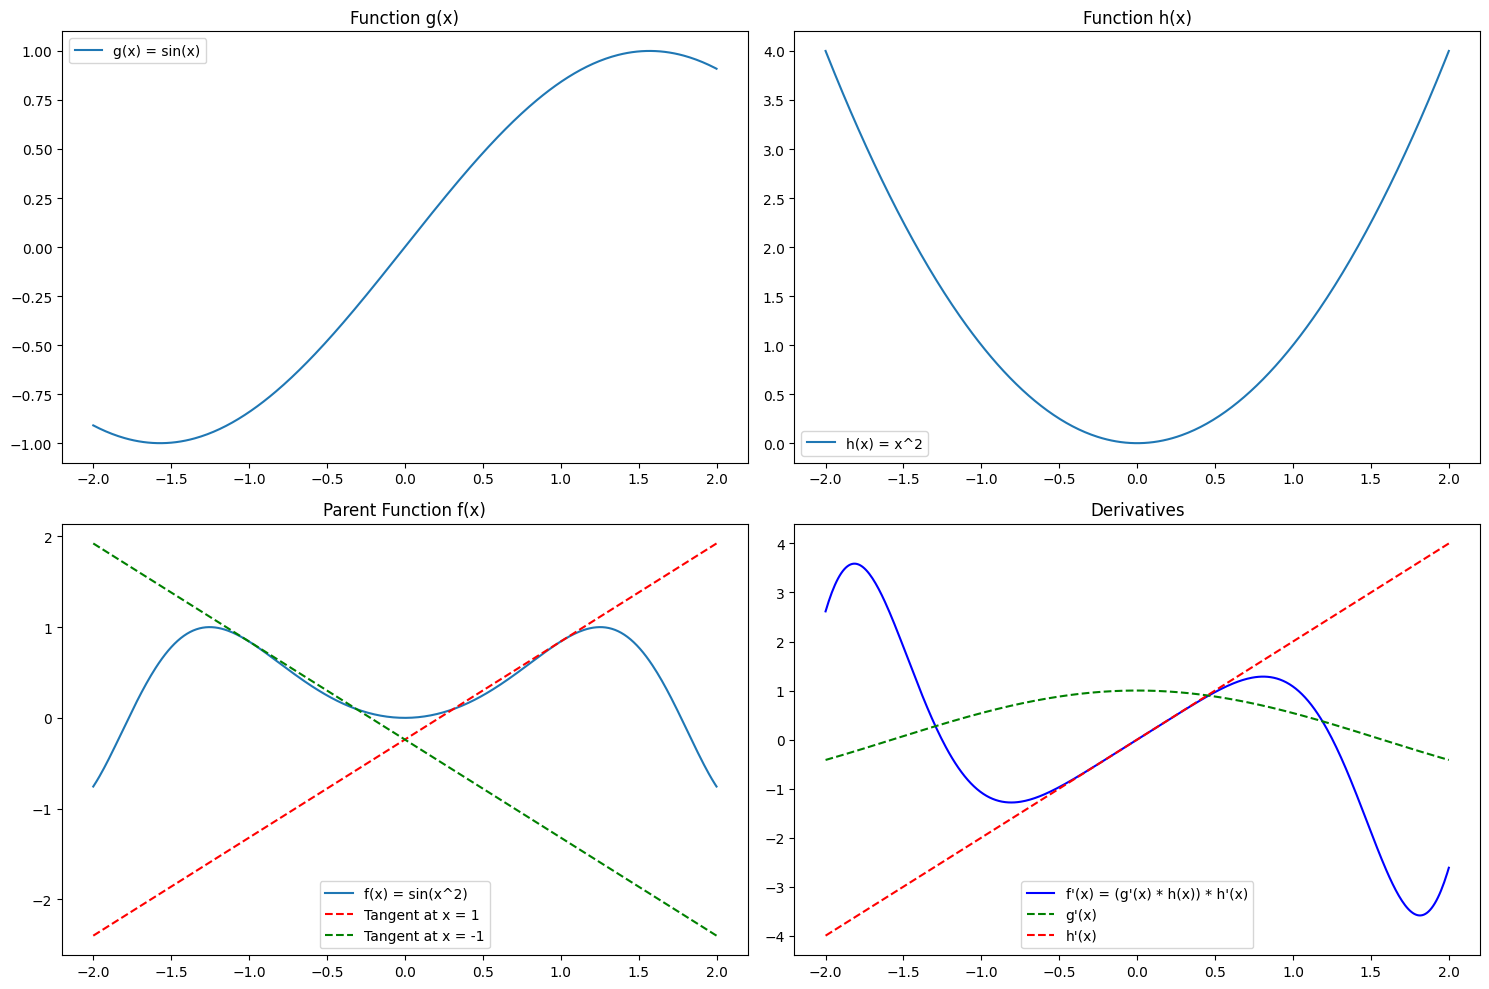

In [8]:
# Define the functions
x = np.linspace(-2, 2, 400)
def g(x):
    return np.sin(x)
def h(x):
    return x**2
def f(x):
    return g(h(x))

# Compute the derivatives
def g_prime(x):
    return np.cos(x)
def h_prime(x):
    return 2*x

# Compute the derivative of f using chain rule
def f_prime(x):
    return g_prime(h(x))* h_prime(x)

def tangent(slope, x, xn, yn):
    return slope * (x - xn) + yn

# Calculate the value and the slope of the function at x = 1
x0 = 1
y0 = f(x0) # y-intercept
slope = f_prime(x0)
# Compute the tangent lines
y_tangent_up = tangent(slope, x, x0, y0)

# Calculate the value and the slope of the function at x = -1
x1 = -1
y1 = f(x1) # y-intercept
slope = f_prime(x1)
# Compute the tangent lines
y_tangent_down = tangent(slope, x, x1, y1)

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(x, g(x), label="g(x) = sin(x)")
plt.title("Function g(x)")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, h(x), label="h(x) = x^2")
plt.title("Function h(x)")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, f(x), label="f(x) = sin(x^2)")
plt.title("Parent Function f(x)")
plt.plot(x, y_tangent_up, 'r--', label='Tangent at x = 1')
plt.plot(x, y_tangent_down, 'g--', label='Tangent at x = -1')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, f_prime(x), label="f'(x) = (g'(x) * h(x)) * h'(x)", color='blue')
plt.plot(x, g_prime(x), label="g'(x)", linestyle='--', color='green')
plt.plot(x, h_prime(x), label="h'(x)", linestyle='--', color='red')
plt.title("Derivatives")
plt.legend()

plt.tight_layout()
plt.show()

## Calculating derivatives

The previous rules we have seen will be useful when we want to calculate the derivative of more complex functions.

Let's take the example of this function:

`f(x) = 3x^2 + 2x + 1`

If we consider that each term is a function, we can start by applying the sum/difference rule of derivatives: e.g. summing up derivatives in this case.

`3x^2` => we can apply the power rule to this one => `(3x^2)' = 2*3x^(2-1) = 6x`

`2x` => we can apply the power rule to this one => `(2x)' = 1*2x^(1-1) = 2`

`1` => the derivative of a constant is 0 => `(1)' = 0`

So we end up with the derivative of the function:

`f'(x) = 6x + 2 + 0 = 6x + 2`

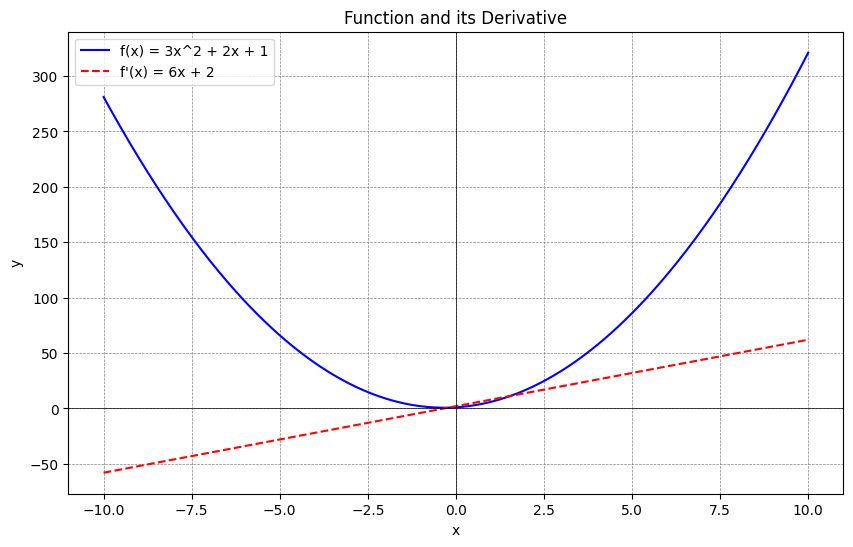

In [9]:
# Define the function f(x) and its derivative f'(x)
def f(x):
    return 3*x**2 + 2*x + 1

def df(x):
    return 6*x + 2

# Generate x values
x = np.linspace(-10, 10, 400)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x) = 3x^2 + 2x + 1', color='blue')
plt.plot(x, df(x), label="f'(x) = 6x + 2", color='red', linestyle='--')
plt.title("Function and its Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


In this example, the point where the derivative crosses the x-axis (`f'(x) = 0`) represents the x-coordinate of the vertex of the parabola.